# micrograd exercises

1. watch the [micrograd video](https://www.youtube.com/watch?v=VMj-3S1tku0) on YouTube
2. come back and complete these exercises to level up :)

## section 1: derivatives

### A mathematical expression

Detour: python functions, lambdas, and uses of last expression in a cell

```python   

In [15]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos

def f(a, b, c): 
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

f_as_lambda = lambda a, b, c: -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5 # lambda limited to single expression which is returned 

f(2, 3, 4) , f_as_lambda(2, 3, 4) , f(2, 3, 4) == f_as_lambda(2, 3, 4) , (lambda a: 3*a)(2)

(6.336362190988558, 6.336362190988558, True, 6)

In [16]:
# for notebook goodness
from IPython.display import display, HTML

### Derivative of $f(a,b,c) = -a^3 +sin(3*b) -1.0/c + b^{2.5} - \sqrt a$  analytically

- write the function df that returns the analytical gradient of f
- i.e. use your skills from calculus to take the derivative, then implement the formula
- if you do not calculus then feel free to ask [wolframalpha](https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29)


In [17]:
def dfda(a):
  return -3*a**2 - 0.5*a**(-0.5) 

def dfdb(b):
  return 3*cos(3*b) + 2.5*b**1.5 

def dfdc(c):
  return 1.0/c**2

def df(a,b,c):
  return [dfda(a), dfdb(b), dfdc(c)]

def gradf(a, b, c):
  return df(a,b,c)
  # return [0, 0, 0] # todo, return [df/da, df/db, df/dc]

# expected answer is the list of
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
analytic_grad = yours
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


### Derivative of $f(a,b,c) = -a^3 +sin(3*b) -1.0/c  + b^{2.5} - a^{.5}$  numerically

- now estimate the gradient numerically without any calculus, using
- the approximation we used in the video.

- you should not call the function df from the last cell

In [18]:
def grad_by_delta(a, b, c):
  h = 1e-6
  v = f(a,b,c)
  return [(f(a+h, b, c) - v) / h,
          (f(a, b+h, c) - v) / h,
          (f(a, b, c+h) - v) / h]

# -----------
numerical_grad = grad_by_delta(2, 3, 4)
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353559348809995
OK for dim 1: expected 10.25699027111255, yours returns 10.256991666679482
OK for dim 2: expected 0.0625, yours returns 0.062499984743169534


### Symmetric Derivative
- there is an alternative formula that provides a much better numerical
- approximation to the derivative of a function.
- learn about it here: [Symmetric_derivative](https://en.wikipedia.org/wiki/Symmetric_derivative)
- implement it. confirm that for the same step size h this version gives a  
- better approximation.

-  Detour: tabulate , *args, walrus operator, pandas styling

In [19]:
def symmetric_grad(a, b, c):
  h = 1e-6
  return [(f(a+h, b, c) - f(a-h, b, c)) / (2*h),
          (f(a, b+h, c) - f(a, b-h, c)) / (2*h),
          (f(a, b, c+h) - f(a, b, c-h)) / (2*h)]  

# -----------
numerical_grad2 = symmetric_grad(2, 3, 4)
# -----------

display(HTML('<hr><h2>Results</h2>'))
for dim in range(3):
  ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")

#~~~~~~~~~~~~~~~
display(HTML('<hr><h2>Tabulating Partials - using tabulate</h2>'))
# tablulate the results of the 3 methods
from tabulate import tabulate
print(tabulate([['analytic_grad', *analytic_grad],  # *list unpacks the list into individual elements - splat operator ; ** unpacks a dictionary
                ['grad_by_delta', *numerical_grad],
                ['symmetric_grad', *numerical_grad2]],
               headers=['method', 'df/da', 'df/db', 'df/dc']))  

display(HTML('<h3>Tabulating Errors ( actual - expected)</h3>'))
# tablulate the differences from the analytic solution
print(tabulate([['grad_by_delta', *[(a - b) for a, b in zip(numerical_grad, ans)]],
                ['symmetric_grad', *[(a - b) for a, b in zip(numerical_grad2, ans)]]],
               headers=['method', 'df/da', 'df/db', 'df/dc']))
#~~~~~~~~~~~~~~~
display(HTML('<hr><h2>Tabulating Partials - using pandas</h2>'))
import pandas as pd
display(pd.DataFrame([['analytic_grad', *analytic_grad],
                ['grad_by_delta', *numerical_grad],
                ['symmetric_grad', *numerical_grad2]],
               columns=['method', 'df/da', 'df/db', 'df/dc']))

display(HTML('<h3>Tabulating Errors ( actual - expected)</h3>'))
# tablulate the differences from the analytic solution
display(
  (df:=pd.DataFrame([['grad_by_delta', *[(a - b) for a, b in zip(numerical_grad, ans)]],
                ['symmetric_grad', *[(a - b) for a, b in zip(numerical_grad2, ans)]]],
               columns=['method', 'df/da', 'df/db', 'df/dc'])).set_index('method'),

  df.style.map(
    lambda x: 'color: red' if abs(x) > 1e-5 else 'color: green' ,
    subset=pd.IndexSlice[:, df.select_dtypes(include='number').columns]
  )
)


OK for dim 0: expected -12.353553390593273, yours returns -12.353553391353245
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027401572
OK for dim 2: expected 0.0625, yours returns 0.06250000028629188


method             df/da    df/db    df/dc
--------------  --------  -------  -------
analytic_grad   -12.3536   10.257   0.0625
grad_by_delta   -12.3536   10.257   0.0625
symmetric_grad  -12.3536   10.257   0.0625


method                 df/da        df/db         df/dc
--------------  ------------  -----------  ------------
grad_by_delta   -5.95822e-06  1.39557e-06  -1.52568e-08
symmetric_grad  -7.59972e-10  2.90317e-09   2.86292e-10


,method,df/da,df/db,df/dc
0,analytic_grad,-12.353553,10.256990,0.0625
1,grad_by_delta,-12.353559,10.256992,0.0625
2,symmetric_grad,-12.353553,10.256990,0.0625


,df/da,df/db,df/dc
method,,,
grad_by_delta,-5.958217e-06,1.395567e-06,-1.525683e-08
symmetric_grad,-7.599716e-10,2.903171e-09,2.862919e-10


,method,df/da,df/db,df/dc
0,grad_by_delta,-0.000006,0.000001,-0.000000
1,symmetric_grad,-0.000000,0.000000,0.000000


## section 2: Value , Expression of Values, Forward Pass, Backprop  
- support for softmax, relu etc

### The Value class

In [20]:
# Value class starter code, with many functions taken out
from math import exp, log

class Value:

  def __init__(self, data, _children=(), _op='', label='', color=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label 
    color = color if color else 'lightyellow' if self.label else 'white'
    self.color = color

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other): # exactly as in the video
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    out.label1 = f'({self.label} \n+ {other.label})'

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out
  
  def __radd__(self, other): # other + self
    return self + other
  
  # ------
  # re-implement all the other functions needed for the exercises below
  # your code here
  def __mul__(self, other): # self * other
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    out.label1 = f'({self.label} * {other.label})'

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other
  
  def log(self):
    out = Value(log(self.data), (self,), 'log')
    out.label1 = f'log({self.label})'

    def _backward():
      self.grad += 1.0 / self.data * out.grad
    out._backward = _backward

    return out
  
  def exp(self):
    out = Value(exp(self.data), (self,), 'exp')
    out.label1 = f'exp({self.label})' 

    def _backward():
      self.grad += exp(self.data) * out.grad
    out._backward = _backward

    return out
  
  def sigmoid(self):
    out = Value(1 / (1 + exp(-self.data)), (self,), 'sigmoid')
    out.label1 = f'sigmoid({self.label})'

    def _backward():
      self.grad += (1 - out.data) * out.data * out.grad
    out._backward = _backward

    return out
  
  def __neg__(self):
    # return self * -1.0
    out = Value(-self.data, (self,), 'neg', f'-{self.label}' if self.label else '')
    out.label1 = f'-{self.label}'

    def _backward():
      self.grad += -1.0 * out.grad
    out._backward = _backward

    return out
  
  def __sub__(self, other):
    return self + (-other)

  # def __pow__(self, other):
  #   other = other if isinstance(other, Value) else Value(other)
  #   out = Value(self.data ** other.data, (self, other), '**')
  #   out.label1 = f'({self.label} ** {other.label})'

  #   def _backward():
  #     self.grad += (other * self.data**(other-1)) * out.grad
  #     # self.grad += (other.data * self.data ** (other.data - 1)) * out.grad
  #     # other.grad += self.data ** other.data * log(self.data) * out.grad
  #   out._backward = _backward

  #   return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += (other * self.data**(other-1)) * out.grad
    out._backward = _backward

    return out
  
  def __truediv__(self, other): # self / other
    return self * other**-1
  
  def __rtruediv__(self, other): # other / self
    return other * self**-1
  
  def relu(self):
    out = Value(max(0, self.data), (self,), 'relu')
    out.label1 = f'relu({self.label})'

    def _backward():
      self.grad += (self.data > 0) * out.grad
    out._backward = _backward

    return out

  
  # --------
  def backward(self): # exactly as in video
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for ix, node in enumerate(reversed(topo)):
      node._bprop_seq = ix
      node._backward()

  
  # some tricks
  def _backward_dbg(self): # added for debugging - to see if a Node gets traversed multiple times as in b = a+a 
    if '_brops' not in self.__dict__:
      self._bprops = 0
    self._bprops += 1
    self._backward()

  def backward_dbg(self):
    self.backward()
    return self

### Visualize an expression of Values
- Draw the graph of Values in an expression - displaying data, grad**∇** and backprop_order**°**
- This uses GraphViz *TODO: Create Animation using Manim*
  
- Detour: Shoving methods into the class whose source code you cannot see

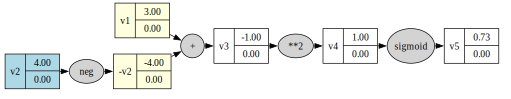

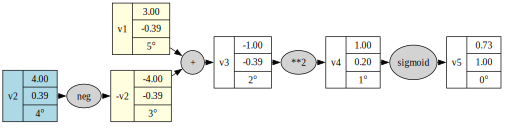

In [ ]:
from graphviz import Digraph

def draw_dot(root, sz=7):
  dot = Digraph()
  dot.attr(rankdir= ['LR', 'TB'][0], size=f'{sz}', nodesep='0.3', ranksep='0.2', margin='0.1')

  def build_dot(v):
    # dot.node(str(id(v)), label= '{'+f"{v.label}|{{{v.data:.02f}|{v.grad:.02f}|{v._bprop_seq}}}" +'}', shape='record', style='filled', fillcolor='lightyellow' if v.label else 'white')
    dot.node(str(id(v)), 
             label= 
            #  f"{{{v.label} | {v._bprop_seq}°}}|{{{v.data:.02f}| {v.grad:.02f}∇ }}"  if hasattr(v, '_bprop_seq') else 
             f"{{{v.label}|{{{v.data:.02f}|{v.grad:.02f}∇|{v._bprop_seq}°}}}}"  if hasattr(v, '_bprop_seq') else 
             f"{{{v.label}|{{{v.data:.02f}|{v.grad:.02f}∇}}}}",
             shape='record', 
             style='filled', 
            #  fillcolor= 'lightyellow' if v.label else 'white'
             fillcolor= v.color, #if ('color' in v) else 'lightyellow' if v.label else 'white'
             color='red' if v.data == 0 else 'black'
    )
    # dot.node(str(id(v)), label= '{'+f"{v.label}|{{{v.data:.02f}|{v.grad:.02f}}}" +'}', shape='record')
    if v._prev:
      o = v._op
      dot.node(str(id(v))+"_op", f"{o}", width=f'{.1*len(o)}', height=f'{.1*len(o)}', style='filled', fill='lightgrey')  
      dot.edge(str(id(v))+"_op", str(id(v)))
    for child in v._prev:
      dot.edge(str(id(child)), str(id(v))+"_op")
      build_dot(child)

  build_dot(root)
  return dot

# add the draw_dot method to the Value class
Value.draw_dot = draw_dot
Value.display = lambda self, sz=7: display(self.draw_dot(sz)) 

#---

from IPython.display import display, HTML
def test_draw_dot(bakprop=True): 
    v1 , v2 = Value(3, label='v1'), Value(4, label='v2', color='lightblue')
    v3 = v1 + -v2 ; v3.label = 'v3'
    # v4 = v3.exp() ; v4.label = 'v4'
    v4 = v3**2 ; v4.label = 'v4'
    v5 = v4.sigmoid() ; v5.label = 'v5'
    if bakprop: v5.backward()
    return v5.draw_dot()
    # return draw_dot(v4)

display(
  HTML("<h3>Forward pass</h3>")
  ,test_draw_dot(not True), HTML("<hr>")
  ,HTML("<h3>Backward pass with grads∇ , order°</h3>")
  ,test_draw_dot() 
)



# def test_draw_dot_b(bakprop=True): 
#     v1 , v2 = Value(3, label='v1'), Value(4, label='v2')
#     v3 = v1 -1*v2 ; v3.label = 'v3'
#     v4 = v3.exp() ; v4.label = 'v4'
#     if bakprop: v4.backward()
#     return v4.draw_dot()
#     # return draw_dot(v4)

# display(
#   HTML("<h3>Forward pass</h3>")
#   ,test_draw_dot_b(not True), HTML("<hr>")
#   # ,HTML("<h3>Backward pass with grads∇ , order°</h3>")
#   # ,test_draw_dot_b() 
# )

### Negative log likelihood loss function using __Value__ (_micrograd_)

- without referencing our code/video __too__ much, make this cell work
- you'll have to implement (in some cases re-implemented) a number of functions
- of the Value object, similar to what we've seen in the video.
- instead of the squared error loss this implements the negative log likelihood
- loss, which is very often used in classification.
  
- $softmax(x) = \frac{e^{x_i}}{\sum_j e^{x_j}}$

2.1755153626167147
OK for dim 0: expected 0.041772570515350445, yours returns 0.041772570515350445
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390245074625319
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302662216329
OK for dim 3: expected -0.8864503806400986, yours returns -0.8864503806400986


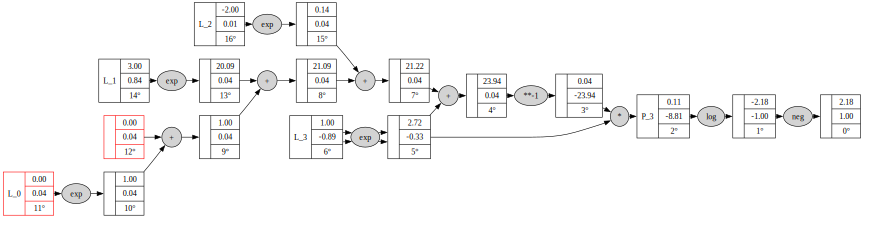

In [9]:
# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
  counts = [logit.exp() for logit in logits]
  denominator = sum(counts)
  out = [c / denominator for c in counts]
  return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]; 
for ix, l in enumerate(logits) : l.label = f'L_{ix}' # for debugging
probs = softmax(logits)
for ix, p in enumerate(probs) : p.label = f'P_{ix}' # for debugging
loss = -probs[3].log() # dim 3 acts as the label for this input example
loss.backward()
print(loss.data)

#--- expected answer is the list of
ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
#---
for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")

draw_dot(loss,sz=12)


### Negative log likelihood loss function using __PyTorch__

- Detour : functions as arguments , f string formatters

In [ ]:
# verify the gradient using the torch library
# torch should give you the exact same gradient
import torch

def torch_grad(*kwargs):
    logits = torch.tensor(kwargs, requires_grad=True)
    print(logits.shape, logits)
    probs = torch.softmax(logits, dim=0)
    loss = -torch.log(probs[3])
    loss.backward()
    return logits.grad
    
def torch_grad1(*kwargs):
    logits = [ torch.tensor(v, requires_grad=True) for v in kwargs]
    # print([l.shape for l in logits], torch.stack(logits).shape)
    probs = torch.softmax(torch.stack(logits), dim=0)
    # print(probs)
    loss = -torch.log(probs[3])
    loss.backward()
    return [l.grad.item() for l in logits]

def test_torch_grad(fn):
    print(f'Testing {fn.__name__}')
    inputs = [0.0, 3.0, -2.0, 1.0]
    expecteds = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
    actuals = fn(*inputs)
    for actual, expected in zip( actuals, expecteds) :
        print(f'\t{"OK" if abs(actual - expected) < 1e-5 else "WRONG!"} expected {expected:.12f}, yours returns {actual:.12f}')

test_torch_grad(torch_grad)
test_torch_grad(torch_grad1)


Testing torch_grad
torch.Size([4]) tensor([ 0.,  3., -2.,  1.], requires_grad=True)
	OK expected 0.041772570515, yours returns 0.041772566736
	OK expected 0.839024507463, yours returns 0.839024484158
	OK expected 0.005653302662, yours returns 0.005653302651
	OK expected -0.886450380640, yours returns -0.886450409889
Testing torch_grad1
[torch.Size([]), torch.Size([]), torch.Size([]), torch.Size([])] torch.Size([4])
	OK expected 0.041772570515, yours returns 0.041772566736
	OK expected 0.839024507463, yours returns 0.839024484158
	OK expected 0.005653302662, yours returns 0.005653302651
	OK expected -0.886450380640, yours returns -0.886450409889


## Neuron, Layer and MLP

Detour: Using the `__call__` method to make a class callable - for forward pass in this case


In [11]:
import random
from pprint import pprint

class Module:

    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        return []

class Neuron(Module):

    def __init__(self, nin, nonlin=True, **kwargs):
        # seed = kwargs.get('seed', 42)
        # random.seed(seed)

        layer = kwargs.get('layer', None)
        label = 'L' if layer is None else f'L{layer}'

        self.w = [Value(random.uniform(-1,1),label=f'{label}_{z}') for z in range(nin)]
        self.b = Value(random.uniform(-1,1),label=f'{label}_b')
        self.nonlin = nonlin

    def __call__(self, x):
        # print([f"{wi}*{xi}" for wi,xi in zip(self.w + [self.b], [ Value(v) for v in x +[1]])])
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        ans = act.relu() if self.nonlin else act
            # print(
            #     f"{ans.data:.5f} = " 
            #     +  ("relu(" if self.nonlin else "" )
            #     +' + '.join([f"{wi.data:.5f}*{xi.data.data}" for wi,xi in zip(self.w + [self.b], [ Value(v) for v in x +[Value(1)]])])
            #     +  (")" if self.nonlin else "" )
            # )
        return ans

    def parameters(self):
        return self.w + [self.b]

    def __repr__(self):
        return f"{'ReLU' if self.nonlin else 'Linear'}Neuron({len(self.w)})"

class Layer(Module):

    def __init__(self, nin, nout, **kwargs):
        self.kwargs = kwargs if kwargs else {}
        self.neurons = [Neuron(nin, **kwargs) for _ in range(nout)]

    def __call__(self, x):
        out = [n(x) for n in self.neurons]
        return out[0] if len(out) == 1 else out

    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]

    def __repr__(self):
        return "\n\t"+f"Layer of [{', '.join(str(n) for n in self.neurons)}]"

class MLP(Module):

    def __init__(self, nin, nouts, **kwargs):
        self.kwargs = kwargs if kwargs else {}
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1], nonlin=i!=len(nouts)-1, layer=i, **kwargs) for i in range(len(nouts))]

    def __call__(self, x):
        verbose = self.kwargs.get('verbose', False)
        if verbose: print(f"Input:{x}")
        for ix, layer in enumerate(self.layers):
            if verbose: print(f"\tLayer:{ix} {x}")
            x = layer(x)

        if verbose: print(f"FinalLayer:{ix} {x}", end='\n\n')
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

    def __repr__(self):
        return f"MLP of [" +f"{', '.join(str(layer) for layer in self.layers)}" + f"\n]"
    

In [ ]:
import pandas as pd

df = pd.DataFrame( {
    'sun': [0, 1, 1, 2, 3, 3, 2, 3, 0, 0, 1, 2, 3],
    'rain': [0, 0, 1, 0, 1, 2, 3, 3, 1, 2, 3, 2, 1],
    'golf': [1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1]
}).assign(
    golf = lambda df: df.golf.map({1:1, -1:0})
)

# split a dataframe into train and test
df_shuffled = df#.sample(frac=1, random_state=42)
df_train = df_shuffled.iloc[:8].reset_index(drop=True)
df_test = df_shuffled.iloc[8:].reset_index
tracker = df_train.copy()

# display(df_train)

mlp = MLP(2, [3,2,1], verbose=False)
for ix, p in enumerate(mlp.parameters()): p.label = f'p_{ix}' # label the parameters for debugging

for tries in range(100):
    # mlp.zero_grad()
    pred0 = [ mlp([ Value(df_train.sun[x]), Value(df_train.rain[x])]) for x in range(len(df_train))]
    pred = [ p.sigmoid() for p in pred0]
    # display(pred[0].draw_dot(12))

    # print ( [ p.data for p in mlp.parameters()] )
    # print ( [ p.grad for p in mlp.parameters()] )
    # print ( [ p.data for p in pred] )
    
    # svm "max-margin" loss
    # losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(df_train.golf, pred)]
    # data_loss = sum(losses) * (1.0 / len(losses))

    # binary cross-entropy loss
    losses = [ (-acti*predi.log() + (-acti+1)*(-predi+1).log() ) for acti, predi in zip(df_train.golf, pred)]
    # losses = [ (-acti*predi.log() + (1-acti)*(1-predi).log() ) for acti, predi in zip(df_train.golf, pred)]
    # losses = [ (-acti*predi.log()) for acti, predi in zip(df_train.golf, pred)]
    # losses[0].draw_dot(12)
    data_loss = sum(losses) * (1.0 / len(losses))
    
    if tries % 10 == 0:
        tracker[f'--{tries}--'] = "---" 
        tracker[f'Pred_{tries}'] = [ p.data for p in pred]
        tracker[f'Loss_{tries}'] = data_loss.data 
        # tracker[f'ΣWeights_{tries}'] = sum([p.data for p in mlp.parameters()])
        # grads = [ p.grad for p in mlp.parameters()]
        # tracker[f'ΣGrad_{tries}'] = sum(grads)
        # tracker[f'GradMinMaxMean_{tries}'] = f'{min(grads):.2f},{max(grads):.2f},{sum(grads)/len(mlp.parameters()):.2f}'


    data_loss.backward()
    for p in mlp.parameters(): p.data -= 0.01 * p.grad
    # for p in mlp.parameters(): p.data -= (0.1/(tries+1)) * p.grad

display ( tracker.T.style.format(lambda x : f"{x:.1f}" if isinstance(x,float) else x )) # loss.draw_dot(12)


# loss = mlp([ Value(4),Value(5)])

# loss.backward()
# for p in mlp.parameters(): p.data -= 0.01 * p.grad
# display(loss.draw_dot(12), hr())
# p1 = mlp.parameters()
# pd.DataFrame([ [p0[i], p1[i].data, p1[i].grad] for i in range(len(p0))], columns=['data0', 'data1', 'grad'])

ValueError: math domain error

## Misc - Graphviz graphs , Manim animation ideas

- Zero grad
- Manin teaser
- Mathjax teaser                                                                            

In [ ]:
MLP(2, [2,1], seed=42, verbose=False)([Value(1111,label="I_0",color='green'),Value(2222,label="I_1",color='green')]).draw_dot(8)

In [ ]:
x1 =Value(11, label='x1')
x2 =Value(22, label='x2')
y = x1*x2 
display(y.backward_dbg().draw_dot())

display(HTML('<hr><h2 style="color:red">  Bug - Grads accumulate ; No Zero Grad</h2>'))
# y.zero_grad()
y = x1 * x2
display(y.backward_dbg().draw_dot())

display(HTML('<hr><h2 style="color:green">  Fixed - Grads accumulate ; Zero Grad</h2>'))
def zg(v):
    for c in v._prev:
        if hasattr(c, 'grad'):
            c.grad = 0
        zg(c)
    return v

display(zg(y).backward_dbg().draw_dot())


In [ ]:
from manim import *
import numpy as np
import re
from manim.utils.color import rgb_to_color

In [ ]:
%%manim -v WARNING --disable_caching -ql -r 400,400 -o 01_LLMAnim LLMAnim

class LLMAnim(Scene):
    def construct(self):
        NeuronsPerLayer = [4, 3, 3]

        # Print the screen dimensions
        width = self.camera.frame_width
        height = self.camera.frame_height
        # print(f"Width: {width}, Height: {height}")

        # Place the neurons in the layers as a circle
        layers = []
        neurons = []
        start_offset = np.array([-(self.camera.frame_width / 2)*.6, .8*(self.camera.frame_height / 2), 0])
        for i, n in enumerate(NeuronsPerLayer):
            layer = []
            for j in range(n):
                neuron = Circle(radius=.5, color=[BLUE, GREEN, RED][i%3] , fill_opacity=.5)
                self.play(Create(neuron), run_time=.5)
                self.play(neuron.animate.move_to(start_offset + 1*(i*4*RIGHT + j*3*DOWN)), run_time=.5)

        self


$$ 
\begin{align*} 
\text{Euler's Formula:} \quad e^{i\pi} + 1 &= 0 \\ 
\text{Quadratic Formula:} \quad x &= \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \\ 
\text{Integral:} \quad \int_{a}^{b} f(x) \, dx &= F(b) - F(a) \\ 
\text{Summation:} \quad \sum_{n=1}^{\infty} \frac{1}{n^2} &= \frac{\pi^2}{6} \\ 
\text{Matrix:} \quad \mathbf{A} &= \begin{pmatrix} a & b \\ c & d \end{pmatrix} 
\end{align*} 
$$

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create our simple 2D dataset
df = pd.DataFrame({
    '🌞': [0, 1, 1, 2, 3, 3, 2, 3, 0, 0, 1, 2, 3],
    '💧': [0, 0, 1, 0, 1, 2, 3, 3, 1, 2, 3, 2, 1],
    'y': [1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1]
}, index=range(1, 14))

# Split into training and test sets
train_df, test_df = df.iloc[:8].copy(), df.iloc[8:].copy()
X_train, y_train = train_df[['🌞', '💧']], train_df['y']
X_test, y_test = test_df[['🌞', '💧']], test_df['y']

# Create and configure our neural network
mlp = MLPClassifier(
    hidden_layer_sizes=(3, 2), # Creates a 2-3-2-1 architecture as discussed
    activation='relu',         # ReLU activation for hidden layers
    solver='sgd',              # Stochastic Gradient Descent optimizer
    batch_size=8,              # Batch size for mini-batch gradient descent
    learning_rate_init=0.1,    # Step size for weight updates
    max_iter=120,              # Maximum number of epochs
    momentum=0,                # Disable momentum for pure SGD as discussed
    random_state=42            # For reproducible results
)

# Train the mode
mlp.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 3: Access the weights and biases
weights = mlp.coefs_
biases = mlp.intercepts_

print("xWeights:", weights)
print("xBiases:", biases)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Step 1: Load dataset and split into train and test sets
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
display(HTML('<hr><h2>  Iris Dataset</h2>'))
display(pd.DataFrame(iris.data, columns=iris.feature_names).head())

# Step 2: Create and fit the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

# Step 3: Access the weights and biases
weights = mlp.coefs_
biases = mlp.intercepts_

print("Weights:", weights)
print("Biases:", biases)

curl http://localhost:11434/api/generate -d '{ "model": "llama3.2", "prompt":"Why is the sky blue?" }'

curl http://localhost:11434/api/generate -d '{ "model": "mistral", "messages":"Why is the sky blue?", stream: True }'

In [1]:
import json
import requests
# NOTE: ollama must be running for this to work, start the ollama app or run `ollama serve`
model = "mistral:latest"  # TODO: update this for whatever model you wish to use
# model = "llama2:latest"

def chat(messages):
    r = requests.post(
        "http://0.0.0.0:11434/api/chat",
        json={"model": model, "messages": messages, "stream": True},
	    stream=True
    )
    r.raise_for_status()
    output = ""

    for line in r.iter_lines():
        body = json.loads(line)
        if "error" in body:
            raise Exception(body["error"])
        if body.get("done") is False:
            message = body.get("message", "")
            content = message.get("content", "")
            output += content
            # the response streams one token at a time, print that as we receive it
            # print(content, end="", flush=True)

        if body.get("done", False):
            message["content"] = output
            return message

def main():
    messages = []
    n = 0 
    while n < 2:
        n += 1
        user_input = f"Tell me a joke #{n}" #input("Enter a prompt: ")
        messages.append({"role": "user", "content": user_input})
        message = chat(messages)
        print(f"\n{user_input} ::\n{message['content']}\n====================\n")

main()



Tell me a joke #1 ::

Why don't scientists trust atoms?

Because they make up everything!


Tell me a joke #2 ::

Okay, here's a joke for you:

Joke #1: Why don't scientists trust atoms? Because they make up everything!

Joke #2: What do you call a fake noodle? An impasta!



In [2]:
!curl http://localhost:11434/api/chat -H "Content-Type: application/json" -d '{ "model": "mistral", "messages":[ {"role":"user","content": "Why is the sky blue?"}], "stream": false }' | jq

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1013  100   909  100   104    195     22  0:00:04  0:00:04 --:--:--   217
{
  "model": "mistral",
  "created_at": "2024-11-14T16:08:36.95627Z",
  "message": {
    "role": "assistant",
    "content": "\nThe sky appears blue due to a phenomenon called Rayleigh scattering. When light from the sun enters Earth's atmosphere, it interacts with gas particles and other molecules in the air. The shorter, blue wavelengths of light are more likely to collide with these particles and be scattered in all directions, making them appear more visible than the longer, red wavelengths. As our eyes are more sensitive to blue light, the sky appears blue during the daytime. This effect is more pronounced during the summer months, when the sun is higher in the sky, and less so during winter, when the sun is lower on the horizon."
  },
  "done_reas